___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_dataset_df = pd.read_csv("Churn_Modelling (1).csv")


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
churn_dataset_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
churn_dataset_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_dataset_df.shape

(10000, 14)

In [6]:
churn_dataset_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_dataset_df.drop("Surname", axis=1, inplace=True)

In [8]:
churn_dataset_df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
churn_dataset_df=pd.get_dummies(churn_dataset_df,drop_first=True)


In [10]:
churn_dataset_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


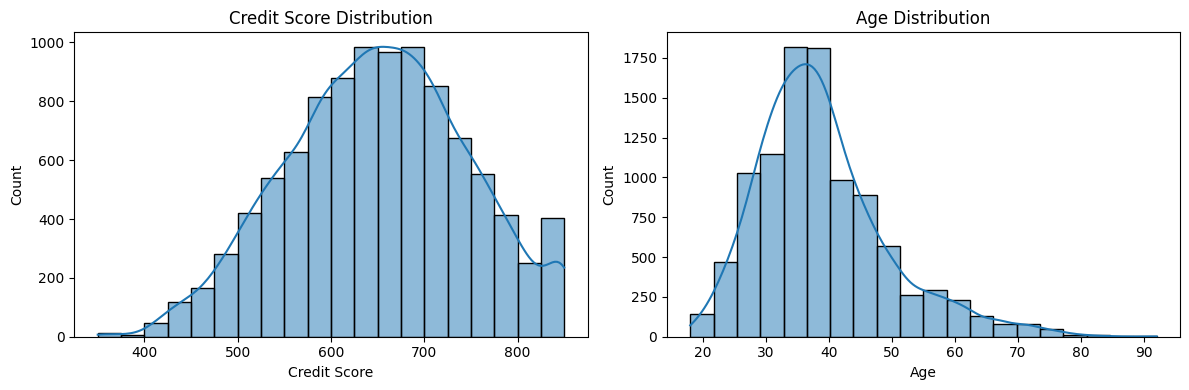

In [11]:
# Histograms for 'CreditScore' and 'Age'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(churn_dataset_df['CreditScore'], bins=20, kde=True)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(churn_dataset_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


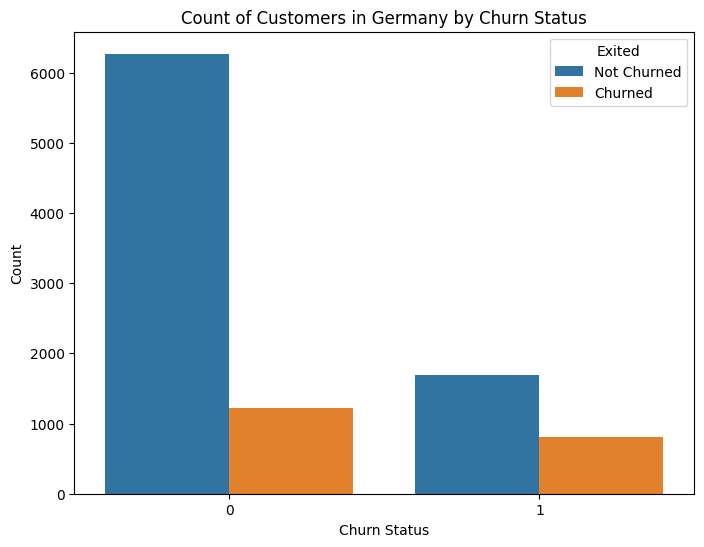

In [12]:
# Countplot for 'Geography'
plt.figure(figsize=(8, 6))
sns.countplot(data=churn_dataset_df, x='Geography_Germany', hue='Exited')
plt.title('Count of Customers in Germany by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
plt.show()

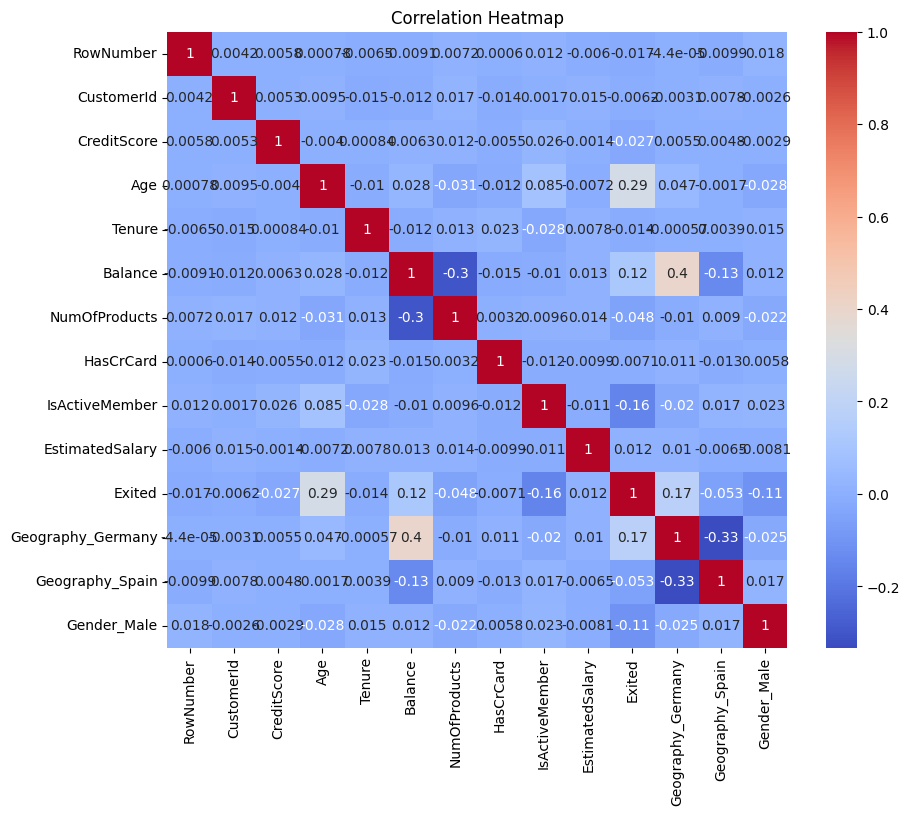

In [13]:
# Heatmap for correlation
correlation = churn_dataset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X should contain the features (excluding 'Exited'), and y should be 'Exited'
X = churn_dataset_df.drop('Exited', axis=1)
y = churn_dataset_df['Exited']

# Split the dataset into training, validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify = y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify = y_train_val, test_size=0.15, random_state=42)

# Standardize the feature values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)



In [15]:
X_train.shape, X_val.shape, X_test.shape

((7225, 13), (1275, 13), (1500, 13))

In [16]:
y_train

5631    0
1672    0
7723    0
5328    0
5515    0
       ..
1051    0
3528    0
9797    0
8983    0
7224    0
Name: Exited, Length: 7225, dtype: int64

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [17]:

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
113/113 [==============================] - 2s 8ms/step - loss: 0.4908 - accuracy: 0.7791 - val_loss: 0.4318 - val_accuracy: 0.8149
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4118 - accuracy: 0.8251 - val_loss: 0.4071 - val_accuracy: 0.8329
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.3873 - accuracy: 0.8404 - val_loss: 0.3850 - val_accuracy: 0.8439
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.3665 - accuracy: 0.8508 - val_loss: 0.3666 - val_accuracy: 0.8541
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.3517 - accuracy: 0.8547 - val_loss: 0.3569 - val_accuracy: 0.8533
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.3448 - accuracy: 0.8561 - val_loss: 0.3527 - val_accuracy: 0.8604
Epoch 7/20
113/113 [==============================] - 1s 6ms/step - loss: 0.3381 - accuracy: 0.8616 - val_loss: 0.3514 - val_accuracy: 0.8620
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8553
Test Accuracy: 85.53%


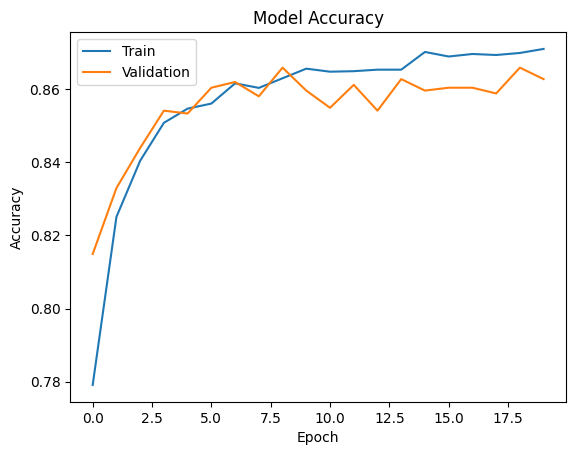

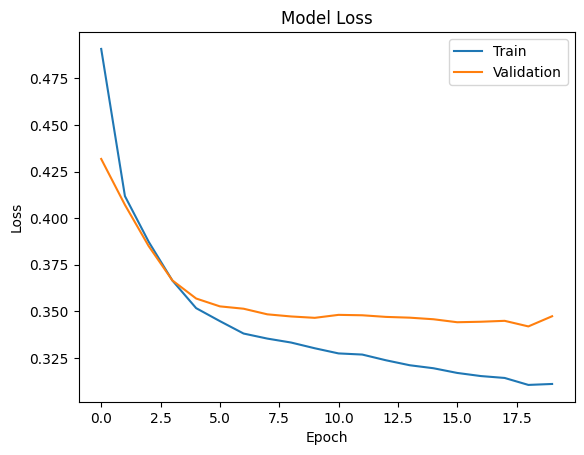

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Confusion Matrix:
 [[1134   60]
 [ 157  149]]


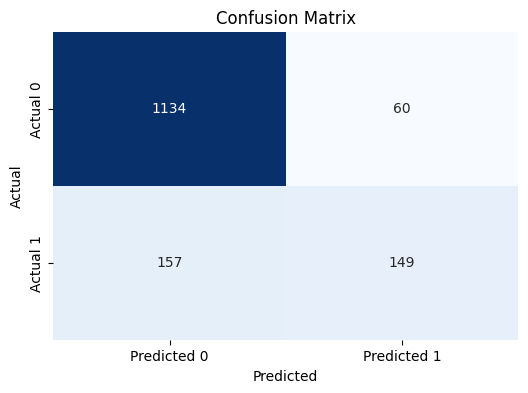

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.71      0.49      0.58       306

    accuracy                           0.86      1500
   macro avg       0.80      0.72      0.75      1500
weighted avg       0.84      0.86      0.84      1500



In [20]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


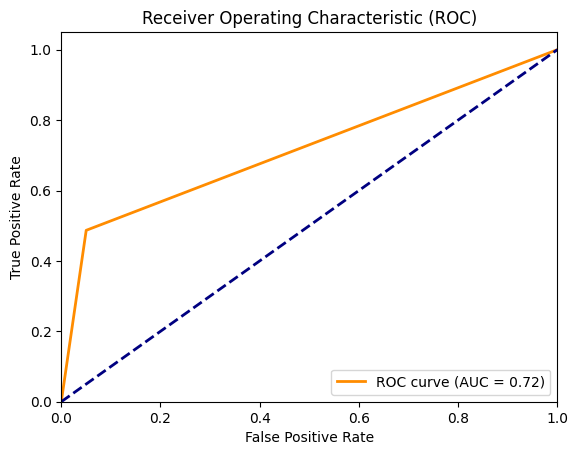

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [22]:
from sklearn.utils import class_weight 

class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6278241223496698, 1: 2.45581237253569}

In [23]:

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, class_weight=class_weights)

Epoch 1/20
113/113 [==============================] - 2s 9ms/step - loss: 0.6134 - accuracy: 0.6559 - val_loss: 0.5704 - val_accuracy: 0.7051
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.5527 - accuracy: 0.7228 - val_loss: 0.5265 - val_accuracy: 0.7459
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.5182 - accuracy: 0.7459 - val_loss: 0.5395 - val_accuracy: 0.7231
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4890 - accuracy: 0.7651 - val_loss: 0.4894 - val_accuracy: 0.7584
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4695 - accuracy: 0.7797 - val_loss: 0.4684 - val_accuracy: 0.7780
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4588 - accuracy: 0.7869 - val_loss: 0.4807 - val_accuracy: 0.7694
Epoch 7/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4534 - accuracy: 0.7859 - val_loss: 0.4704 - val_accuracy: 0.7741
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7647
Test Accuracy: 76.47%


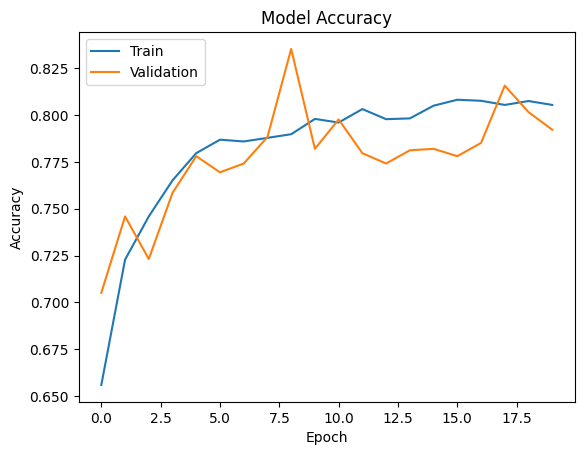

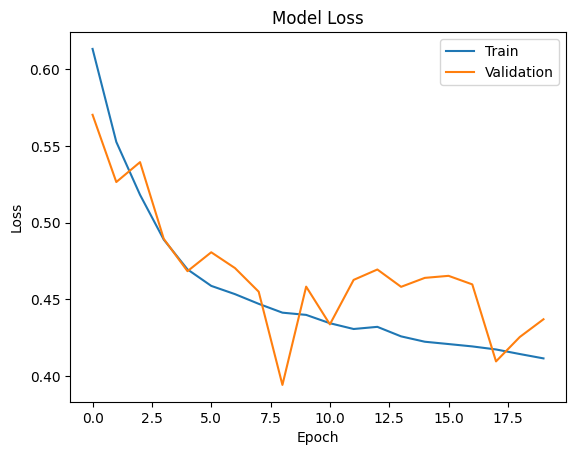

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Confusion Matrix:
 [[923 271]
 [ 82 224]]


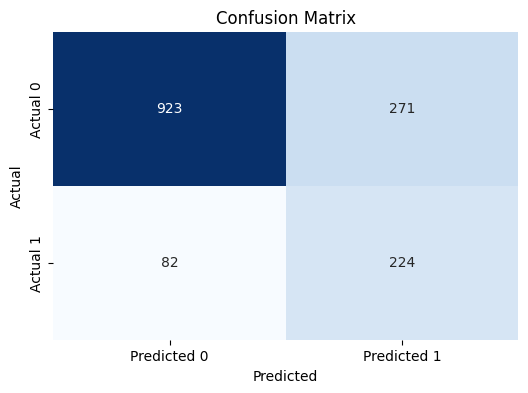

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1194
           1       0.45      0.73      0.56       306

    accuracy                           0.76      1500
   macro avg       0.69      0.75      0.70      1500
weighted avg       0.82      0.76      0.78      1500



In [26]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


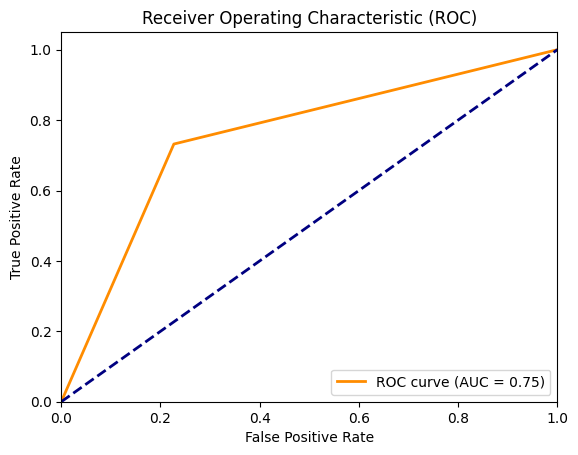

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

c:\Users\haris.binamir\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
113/113 [==============================] - 2s 8ms/step - loss: 0.5459 - accuracy: 0.7201 - val_loss: 0.5264 - val_accuracy: 0.7451
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4849 - accuracy: 0.7755 - val_loss: 0.5167 - val_accuracy: 0.7678
Epoch 3/20
113/113 [==============================] - 1s 6ms/step - loss: 0.4634 - accuracy: 0.7918 - val_loss: 0.4752 - val_accuracy: 0.7827
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4600 - accuracy: 0.7952 - val_loss: 0.4196 - val_accuracy: 0.8173
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4516 - accuracy: 0.7982 - val_loss: 0.4813 - val_accuracy: 0.7804
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.8039 - val_loss: 0.4617 - val_accuracy: 0.7859
Epoch 7/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4387 - accuracy: 0.8064 - val_loss: 0.5012 - val_accuracy: 0.7741
Epoch 

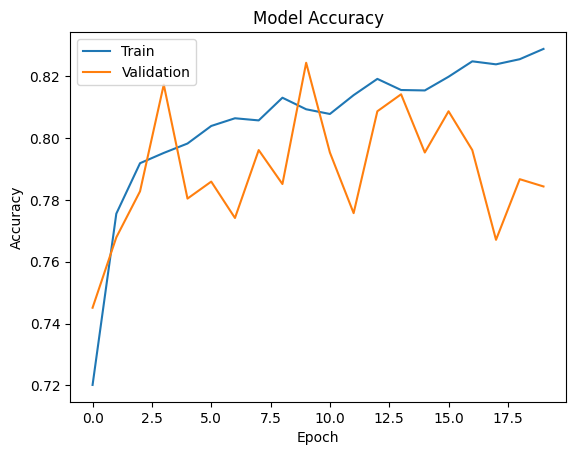

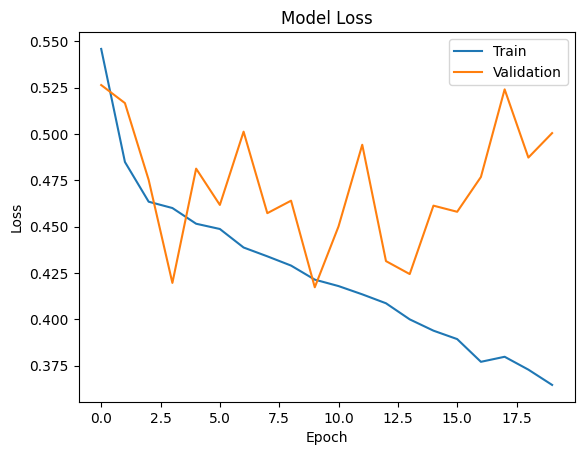

Confusion Matrix:
 [[938 256]
 [ 96 210]]


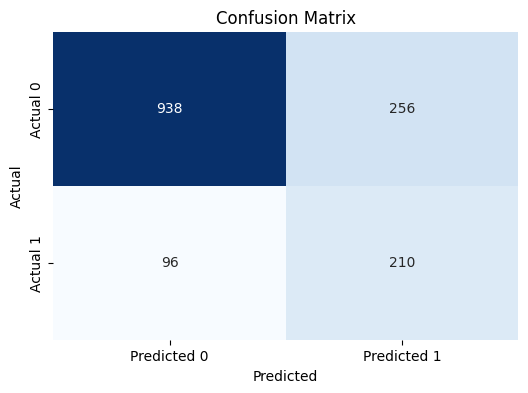

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      1194
           1       0.45      0.69      0.54       306

    accuracy                           0.77      1500
   macro avg       0.68      0.74      0.69      1500
weighted avg       0.81      0.77      0.78      1500



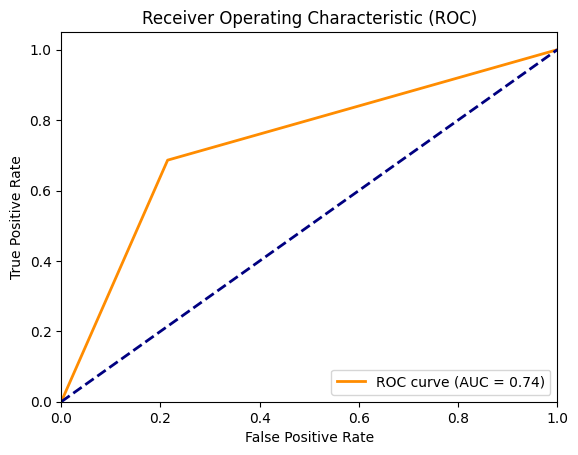

In [28]:

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# increase lr to 0.01, deafult is set to 0.001
optimizer = tf.keras.optimizers.Adam(lr=0.01)
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, class_weight=class_weights)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Add Dropout Layer

Epoch 1/20
113/113 [==============================] - 2s 9ms/step - loss: 0.6664 - accuracy: 0.5683 - val_loss: 0.6031 - val_accuracy: 0.6933
Epoch 2/20
113/113 [==============================] - 1s 7ms/step - loss: 0.5997 - accuracy: 0.6796 - val_loss: 0.5799 - val_accuracy: 0.6941
Epoch 3/20
113/113 [==============================] - 1s 6ms/step - loss: 0.5714 - accuracy: 0.7120 - val_loss: 0.5586 - val_accuracy: 0.7114
Epoch 4/20
113/113 [==============================] - 1s 6ms/step - loss: 0.5526 - accuracy: 0.7125 - val_loss: 0.5061 - val_accuracy: 0.7467
Epoch 5/20
113/113 [==============================] - 1s 6ms/step - loss: 0.5435 - accuracy: 0.7265 - val_loss: 0.5060 - val_accuracy: 0.7522
Epoch 6/20
113/113 [==============================] - 1s 7ms/step - loss: 0.5307 - accuracy: 0.7377 - val_loss: 0.4987 - val_accuracy: 0.7584
Epoch 7/20
113/113 [==============================] - 1s 6ms/step - loss: 0.5150 - accuracy: 0.7477 - val_loss: 0.4883 - val_accuracy: 0.7741
Epoch 

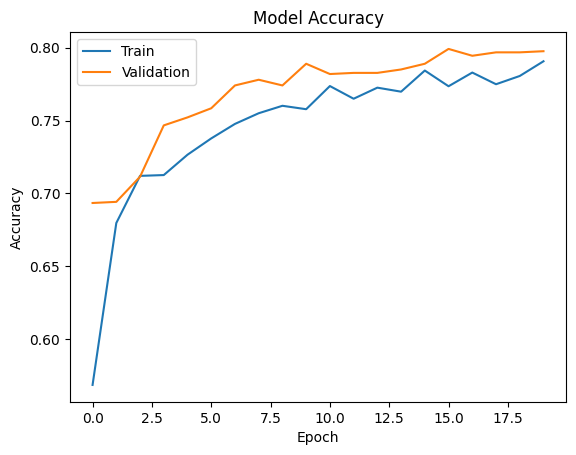

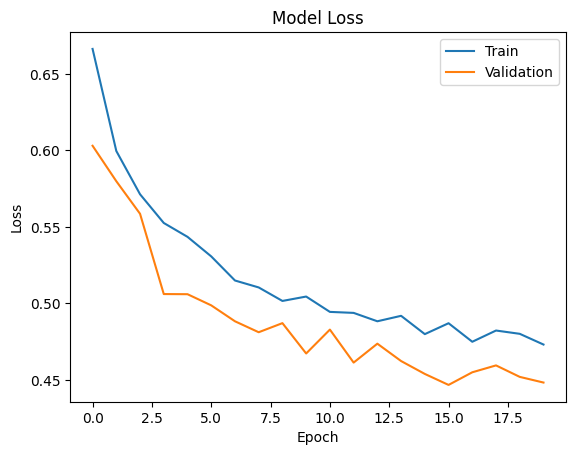

Confusion Matrix:
 [[929 265]
 [ 79 227]]


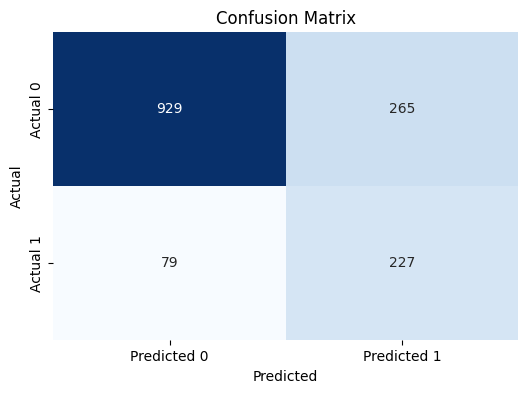

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84      1194
           1       0.46      0.74      0.57       306

    accuracy                           0.77      1500
   macro avg       0.69      0.76      0.71      1500
weighted avg       0.83      0.77      0.79      1500



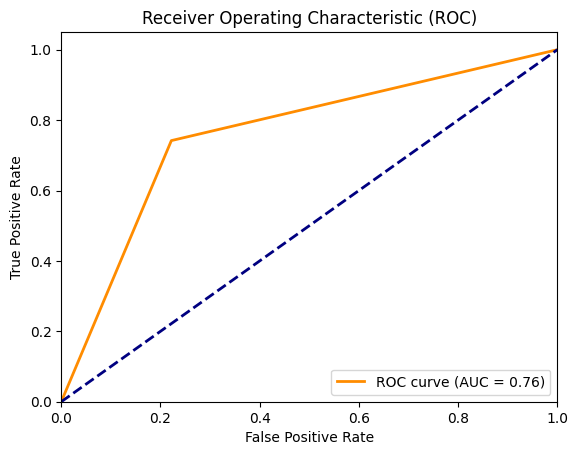

In [29]:

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, class_weight=class_weights)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

Epoch 1/20
113/113 [==============================] - 2s 8ms/step - loss: 0.6075 - accuracy: 0.6260 - val_loss: 0.5989 - val_accuracy: 0.6910
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.5343 - accuracy: 0.7315 - val_loss: 0.5195 - val_accuracy: 0.7349
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4980 - accuracy: 0.7571 - val_loss: 0.5135 - val_accuracy: 0.7467
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4777 - accuracy: 0.7689 - val_loss: 0.4472 - val_accuracy: 0.7890
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4644 - accuracy: 0.7794 - val_loss: 0.4814 - val_accuracy: 0.7655
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4554 - accuracy: 0.7839 - val_loss: 0.4591 - val_accuracy: 0.7851
Epoch 7/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4492 - accuracy: 0.7877 - val_loss: 0.4855 - val_accuracy: 0.7616
Epoch 

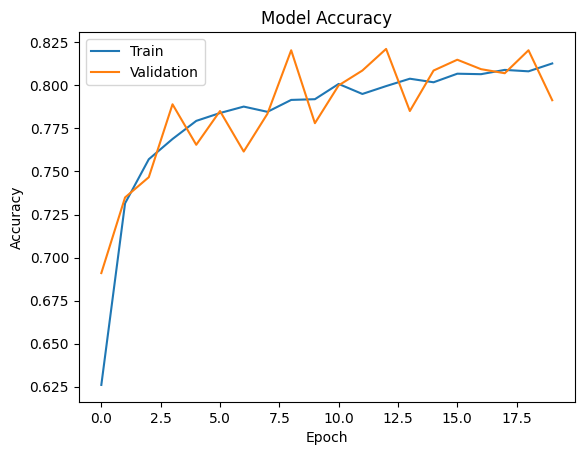

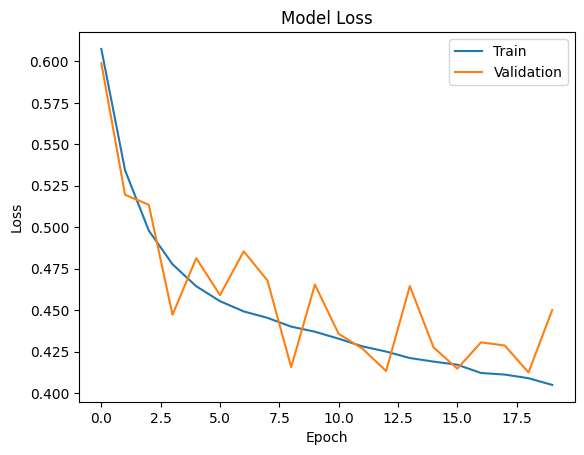

Confusion Matrix:
 [[901 293]
 [ 72 234]]


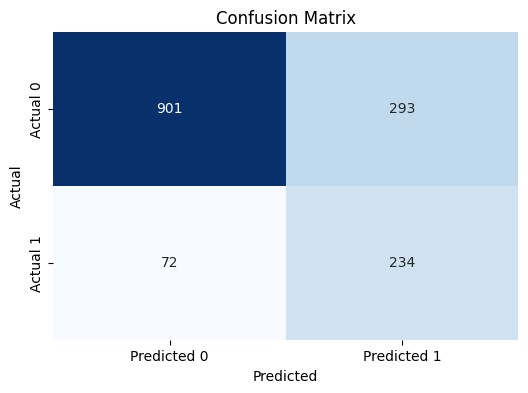

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1194
           1       0.44      0.76      0.56       306

    accuracy                           0.76      1500
   macro avg       0.69      0.76      0.70      1500
weighted avg       0.83      0.76      0.78      1500



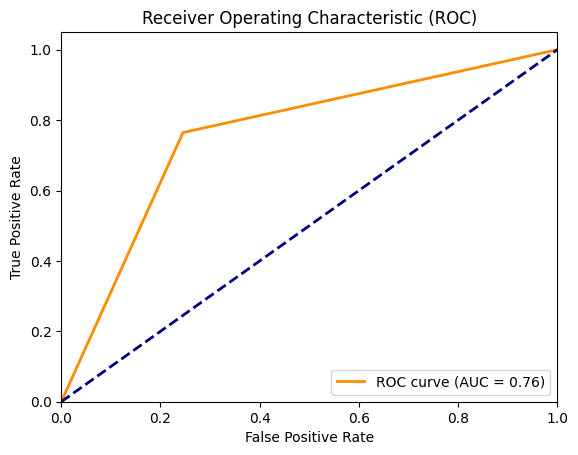

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, class_weight=class_weights, callbacks = [early_stop])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Monitor the "val_recall" as metric

Epoch 1/20
113/113 [==============================] - 2s 8ms/step - loss: 0.6154 - accuracy: 0.6425 - val_loss: 0.5337 - val_accuracy: 0.7427
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.5366 - accuracy: 0.7304 - val_loss: 0.5258 - val_accuracy: 0.7404
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.5037 - accuracy: 0.7502 - val_loss: 0.4767 - val_accuracy: 0.7765
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4815 - accuracy: 0.7642 - val_loss: 0.4674 - val_accuracy: 0.7820
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4703 - accuracy: 0.7727 - val_loss: 0.4809 - val_accuracy: 0.7773
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4602 - accuracy: 0.7779 - val_loss: 0.4656 - val_accuracy: 0.7914
Epoch 7/20
113/113 [==============================] - 1s 6ms/step - loss: 0.4544 - accuracy: 0.7839 - val_loss: 0.4536 - val_accuracy: 0.7984
Epoch 

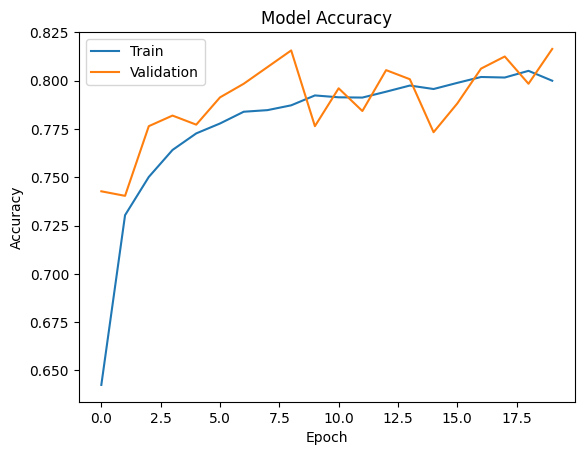

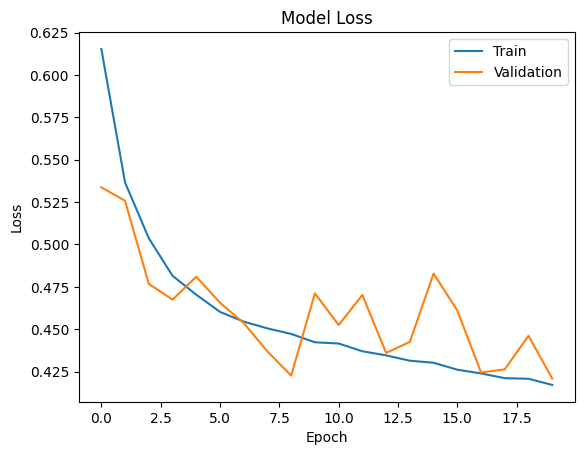

Confusion Matrix:
 [[945 249]
 [ 80 226]]


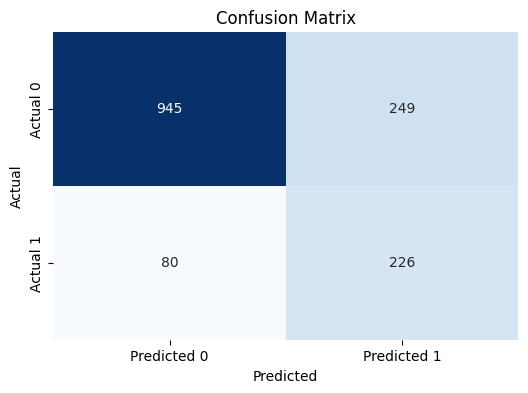

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1194
           1       0.48      0.74      0.58       306

    accuracy                           0.78      1500
   macro avg       0.70      0.77      0.72      1500
weighted avg       0.83      0.78      0.80      1500



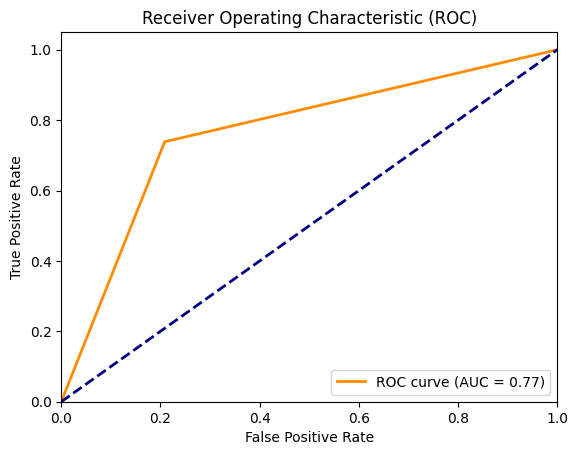

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, class_weight=class_weights, callbacks = [early_stop])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Optuna

In [32]:
import optuna

# Define the objective function to be optimized by Optuna
def objective(trial):
    # Define hyperparameters to optimize
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
    
    # Define the model with the suggested hyperparameters
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights)
  
    val_accuracy = history.history['val_accuracy'][-1]
    
    return val_accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Print the best hyperparameters and result
print("Best trial:")
best_trial = study.best_trial
print("Value: ", best_trial.value)
print("Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

best_learning_rate = best_trial.params["learning_rate"]
best_dropout_rate = best_trial.params["dropout_rate"]
print("Best Learning Rate: ", best_learning_rate)
print("Best Dropout Rate: ", best_dropout_rate)

best_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
best_model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
best_model_history = best_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights)


[I 2023-10-30 01:28:54,130] A new study created in memory with name: no-name-eda39972-e530-418d-aba9-690393159b4c
C:\Users\haris.binamir\AppData\Local\Temp\ipykernel_6104\301407662.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
C:\Users\haris.binamir\AppData\Local\Temp\ipykernel_6104\301407662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
[I 2023-10-30 01:29:08,098] Trial 0 finished with value: 0.7694117426872253 and parameters: {'learning_rate': 0.0005540998694007928, 'dropout_rate': 0.3275316910849815}. Best is trial 0 with value: 0.76941174268

Best trial:
Value:  0.8549019694328308
Params: 
    learning_rate: 0.06461862546427317
    dropout_rate: 0.21849043814293856
Best Learning Rate:  0.06461862546427317
Best Dropout Rate:  0.21849043814293856


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

47/47 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.8320
Test Accuracy: 83.20%


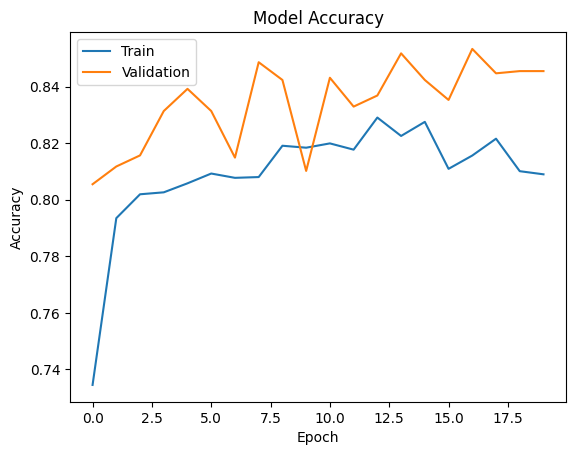

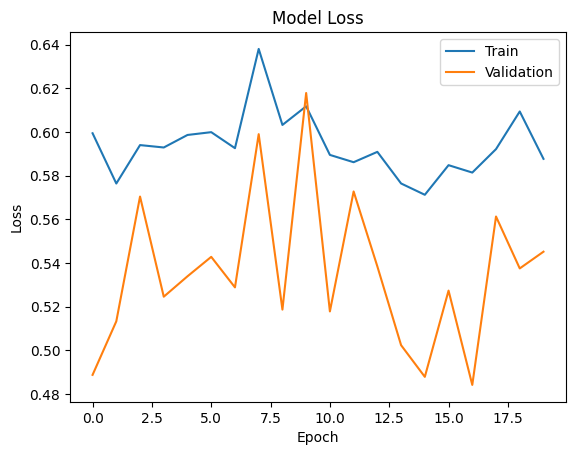

Confusion Matrix:
 [[1082  112]
 [ 140  166]]


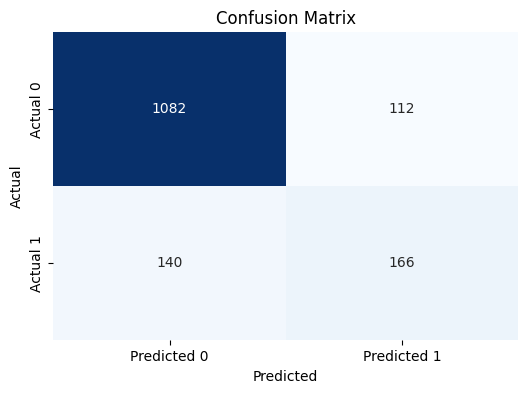

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1194
           1       0.60      0.54      0.57       306

    accuracy                           0.83      1500
   macro avg       0.74      0.72      0.73      1500
weighted avg       0.83      0.83      0.83      1500



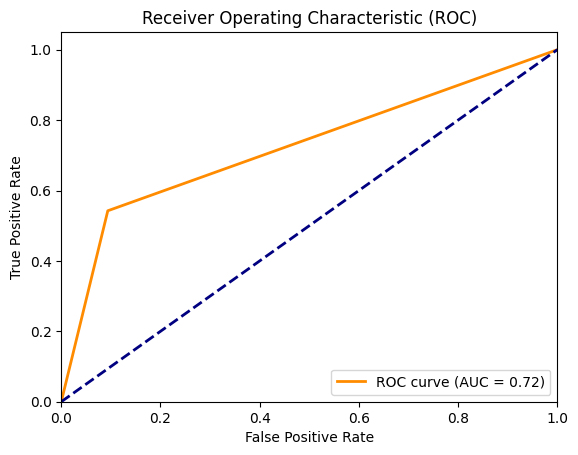

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(best_model_history.history['accuracy'])
plt.plot(best_model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_model_history.history['loss'])
plt.plot(best_model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Final Model and Model Deployment

In [34]:
# Save the weights of the best model
best_model.save('best_model.keras')

## Prediction

In [35]:
loaded_model = tf.keras.models.load_model('best_model.keras')
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 1s 3ms/step - loss: 0.5586 - accuracy: 0.8320
Test Accuracy: 83.20%


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___